In [ ]:
# ========================================================ASSIGNMENT_11================================================================================

In [ ]:
# -----------------------------------------------------1. Data Preparation:-------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [ ]:
# Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [4]:
file_path = r'11. heart_disease.xlsx'
df = pd.read_excel(file_path, sheet_name=None) 

In [5]:
print("Sheet names:", df.keys())

Sheet names: dict_keys(['Description', 'Heart_disease'])


In [7]:
df_heart = pd.read_excel(file_path, sheet_name = 'Heart_disease')

In [8]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [16]:
df

{'Description':          age                                       Age in years
 0     Gender                       Gender ; Male - 1, Female -0
 1         cp                                    Chest pain type
 2   trestbps                             Resting blood pressure
 3       chol                                cholesterol measure
 4        fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...
 5    restecg  ecg observation at resting condition,   -- Val...
 6     thalch                        maximum heart rate achieved
 7      exang                            exercise induced angina
 8    oldpeak  ST depression induced by exercise relative to ...
 9      slope          the slope of the peak exercise ST segment
 10      thal                                               Thal
 11       num  target [0=no heart disease; 1,2,3,4 = stages o...,
 'Heart_disease':      age   sex               cp  trestbps  chol    fbs           restecg  \
 0     63  Male   typical angina       145   

In [19]:
print("Dataset Shape:", df_heart.shape)

Dataset Shape: (908, 13)


In [18]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
#---------------------------------------------------- 2. Exploratory Data Analysis (EDA):--------------------------------------------------------------

In [ ]:
# Check for missing values, outliers, and inconsistencies in the data.

In [20]:
print("Missing Values Before Preprocessing:")
print(df_heart.isnull().sum())

Missing Values Before Preprocessing:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [24]:
print("\nStatistical Summary:")
print(df_heart.describe())


Statistical Summary:
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


In [ ]:
# Visualize the distribution of features, including histograms, box plots, and correlation matrices.

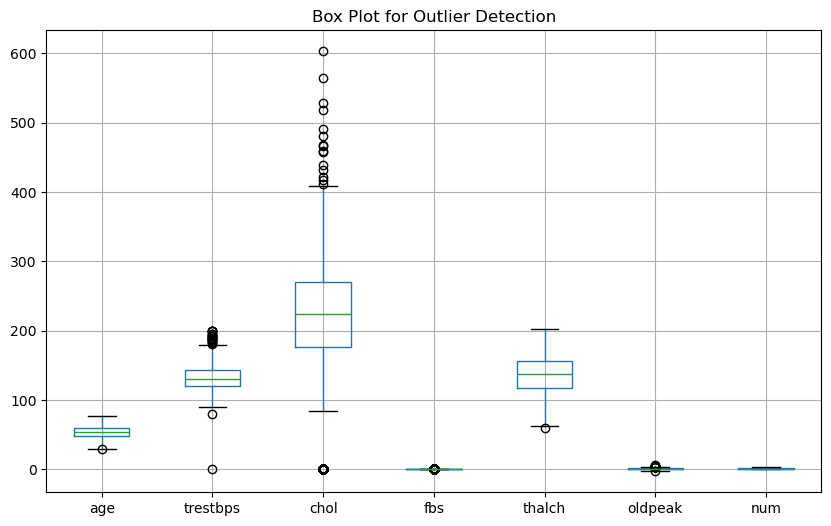

In [28]:
import matplotlib.pyplot as plt

df_heart.boxplot(figsize=(10,6))
plt.title("Box Plot for Outlier Detection")
plt.show()

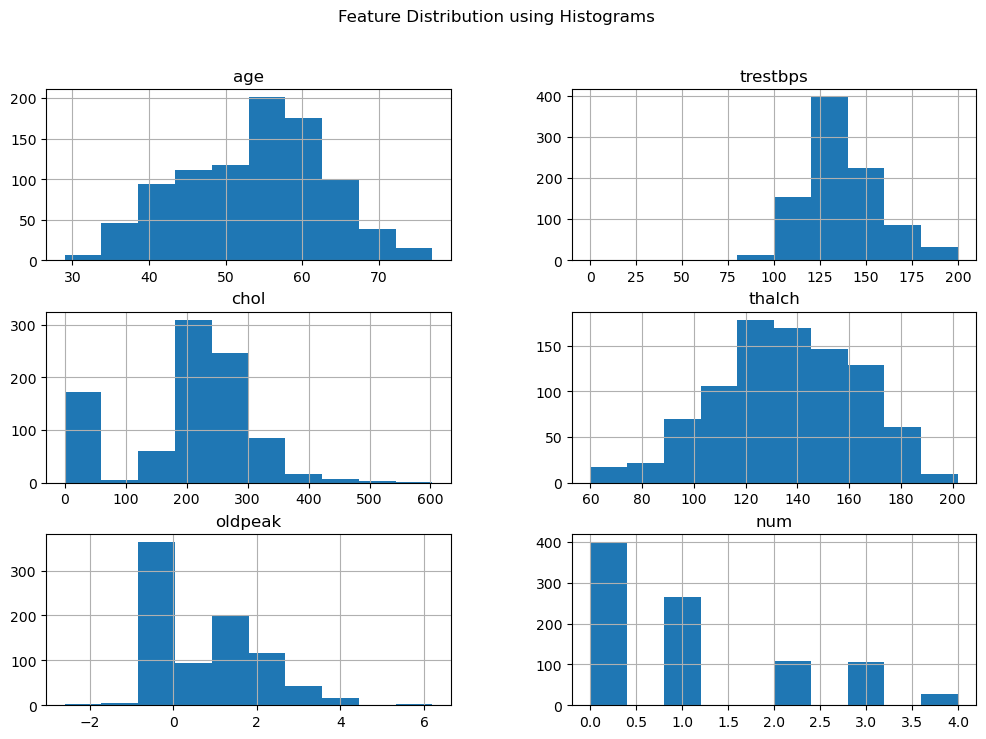

In [29]:
df_heart.hist(figsize=(12,8))
plt.suptitle("Feature Distribution using Histograms")
plt.show()

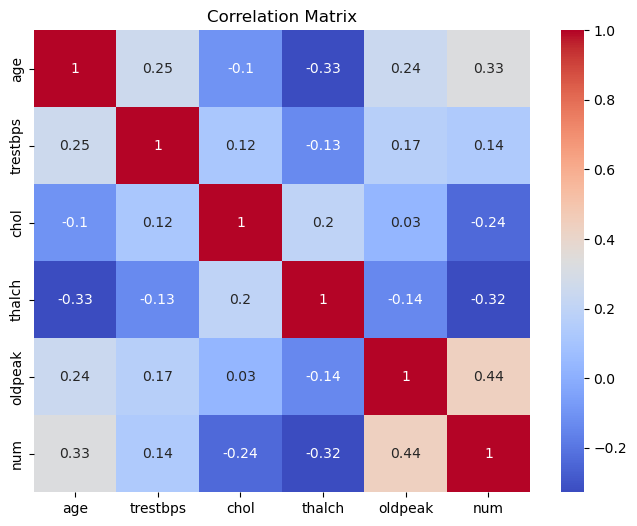

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df_heart.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# ------------------------------------------------------3. Feature Engineering:-----------------------------------------------------------------------
# If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

In [36]:
df_heart.fillna(df_heart.median(numeric_only=True), inplace=True)

In [37]:
df_heart.fillna(df_heart.mode().iloc[0], inplace=True)

In [41]:
# Encoding Categorical Variables

bool_cols = df_heart.select_dtypes(include='bool').columns
df_heart[bool_cols] = df_heart[bool_cols].astype(int)

In [43]:
df_heart = df_heart.replace({True: 1, False: 0})

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

obj_cols = df_heart.select_dtypes(include='object').columns

for col in obj_cols:
    df_heart[col] = le.fit_transform(df_heart[col].astype(str))

In [46]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = df_heart.select_dtypes(include=['int64', 'float64']).columns
df_heart[numeric_cols] = scaler.fit_transform(df_heart[numeric_cols])

In [52]:
# Convert target to binary classification
df_heart['num'] = df_heart['num'].apply(lambda x: 0 if x == 0 else 1)

In [67]:
# --------------------------------------------------4. Decision Tree Classification:-----------------------------------------------------------------

In [82]:
# Split the dataset into training and testing sets (e.g., using an 80-20 split).

X = df_heart.iloc[:, :-1]
y = df_heart.iloc[:, -1]

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(y_test.value_counts()) 

num
1    182
Name: count, dtype: int64


In [131]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

In [132]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [99]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    random_state=42
)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [119]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)

# Predictions
y_pred = dt_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix 
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred, labels=[0, 1]))

# ROC-AUC 
if len(dt_model.classes_) == 2:
    y_pred_prob = dt_model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print("ROC-AUC Score:", roc_auc)
else:
    print("ROC-AUC Score: Not defined (single class prediction)")

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       182

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182


Confusion Matrix:
[[  0   0]
 [  0 182]]
ROC-AUC Score: Not defined (single class prediction)


In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [102]:
# maximum depth

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depths = [2, 3, 4, 5, None]

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Max Depth: {depth}, Accuracy: {accuracy_score(y_test, y_pred)}")

Max Depth: 2, Accuracy: 1.0
Max Depth: 3, Accuracy: 1.0
Max Depth: 4, Accuracy: 1.0
Max Depth: 5, Accuracy: 1.0
Max Depth: None, Accuracy: 1.0


In [103]:
# Experimenting with Minimum Samples Split

splits = [2, 5, 10]

for split in splits:
    model = DecisionTreeClassifier(min_samples_split=split, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Min Samples Split: {split}, Accuracy: {accuracy_score(y_test, y_pred)}")

Min Samples Split: 2, Accuracy: 1.0
Min Samples Split: 5, Accuracy: 1.0
Min Samples Split: 10, Accuracy: 1.0


In [104]:
# Experimenting with Criterion

criteria = ['gini', 'entropy']

for crit in criteria:
    model = DecisionTreeClassifier(criterion=crit, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Criterion: {crit}, Accuracy: {accuracy_score(y_test, y_pred)}")

Criterion: gini, Accuracy: 1.0
Criterion: entropy, Accuracy: 1.0


In [105]:
# Combined Experiment (Manual Tuning)
for depth in [3, 4]:
    for split in [2, 5]:
        for crit in ['gini', 'entropy']:
            model = DecisionTreeClassifier(
                max_depth=depth,
                min_samples_split=split,
                criterion=crit,
                random_state=42
            )
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            print(f"Depth={depth}, Split={split}, Criterion={crit} → Accuracy={acc}")

Depth=3, Split=2, Criterion=gini → Accuracy=1.0
Depth=3, Split=2, Criterion=entropy → Accuracy=1.0
Depth=3, Split=5, Criterion=gini → Accuracy=1.0
Depth=3, Split=5, Criterion=entropy → Accuracy=1.0
Depth=4, Split=2, Criterion=gini → Accuracy=1.0
Depth=4, Split=2, Criterion=entropy → Accuracy=1.0
Depth=4, Split=5, Criterion=gini → Accuracy=1.0
Depth=4, Split=5, Criterion=entropy → Accuracy=1.0


In [106]:
# 6. Model Evaluation and Analysis:
# Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
# Visualize the decision tree structure to understand the rules learned by the model and identify important features

In [133]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree: {:.2f}%".format(accuracy * 100))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy of Decision Tree: 100.00%

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        91

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



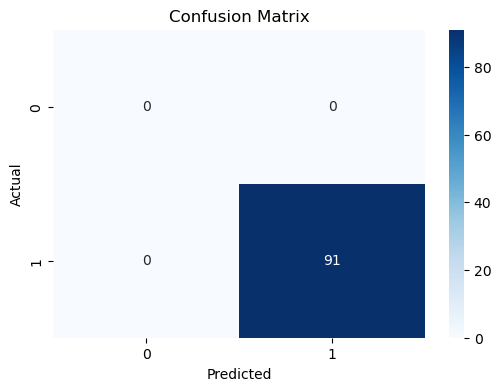

In [141]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

all_labels = [0, 1]  

cm = confusion_matrix(y_test, y_pred, labels=all_labels)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Interview Questions:
# 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
# Decision trees have several hyperparameters that control their complexity, performance, and tendency to overfit.
# max_depth: Limits how deep the tree can grow (number of levels).
# Effect: Controls complexity; deeper trees (higher max_depth) overfit, shallower trees (lower max_depth) underfit.
    
# min_samples_split: Minimum samples required in a node to split further.
# Effect: Higher values create simpler trees, reducing overfitting but increasing bias.

# min_samples_leaf: Minimum samples required in a leaf node.
# Effect: Prevents leaves from being too specific, making the tree more generalizable.

# max_features: Maximum number of features to consider at each split.
# Effect: Restricting features reduces model variance, making trees less correlated and better for ensembles like Random Forests.
                                                                                            
# criterion (Gini/Entropy): The function used to measure impurity (Gini impurity or Information Gain/Entropy).
# Effect: Gini is faster; Entropy often leads to more balanced splits but is computationally heavier.

# min_impurity_decrease: Minimum reduction in impurity required for a split to occur.
# Effect: Higher values make the tree stricter, preventing trivial splits and reducing overfitting. 

# 2. What is the difference between the Label encoding and One-hot encoding?
# Label encoding converts each category in a feature into a unique integer value. For example, colors like Red, Green, and Blue could be encoded as 0, 1, and 2. 
# This method is suitable for ordinal data, where the order of categories matters. However, it can unintentionally introduce a sense of order in nominal data, which may mislead some algorithms.

# One-hot encoding, on the other hand, creates a separate binary column for each category. 
# Using the same example, Red becomes [1,0,0], Green [0,1,0], and Blue [0,0,1]. This method is ideal for nominal data with no inherent order, as it avoids implying any hierarchy between categories.